# GestaltMML Training

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
gmdb_rare_train = pd.read_csv('./projects/gmdb_metadata_v1.0.9/gmdb_rare_gallery_images_v1.0.9.csv')
gmdb_rare_test = pd.read_csv('./projects/gmdb_metadata_v1.0.9/gmdb_rare_test_images_v1.0.9.csv')
gmdb_fre_train = pd.read_csv('./projects/gmdb_metadata_v1.0.9/gmdb_frequent_gallery_images_v1.0.9.csv')
gmdb_fre_test = pd.read_csv('./projects/gmdb_metadata_v1.0.9/gmdb_frequent_test_images_v1.0.9.csv')
raw = pd.read_csv('./projects/gmdb_metadata_v1.0.9/image_metadata_v1.0.9.tsv', sep = '\t')

In [2]:
rare_train = gmdb_rare_train[gmdb_rare_train['split'] == 1]
rare_test = gmdb_rare_test[gmdb_rare_test['split'] == 1]
rare_total = pd.concat([rare_train,rare_test])
len(rare_total)

1217

In [3]:
meta_data = raw.copy()
for i in range(len(meta_data)):
  if pd.isnull(meta_data.loc[i,'disorder_names']):
    meta_data.loc[i,'disorder_names'] = meta_data.loc[i,'gene_names']
meta_data.loc[0,'disorder_names']

'WILLIAMS-BEUREN SYNDROME'

In [4]:
meta_data = meta_data.drop(labels = ['test_type','hgvs','distinctiveness','pmid','doi','updated_at', 'created_at','absent_features','image_type','private', 'consent','patient_group','author','email','patient_name', 'person_type','age_note','username'], axis = 1)
meta_data['ethnicity_sub_category'] = meta_data['ethnicity_sub_category'].fillna('unknown')
meta_data.head()

,image_id,patient_id,filename,gene_names,gene_entrez_ids,disorder_names,omim_ids,present_features,age_year,age_month,gender,ethnicity,ethnicity_note,ethnicity_category,ethnicity_sub_category,internal_syndrome_id,internal_syndrome_name
0,1,2,1.png,NaN,NaN,WILLIAMS-BEUREN SYNDROME,194050,HP:0000293;HP:0000343;HP:0000436;HP:0000629;HP...,NaN,NaN,male,[],Caucasian,European,unknown,1,WILLIAMS-BEUREN SYNDROME; WBS
1,2,3,2.png,NaN,NaN,WILLIAMS-BEUREN SYNDROME,194050,HP:0000154;HP:0000687;HP:0012471,NaN,NaN,male,[],Caucasian,European,unknown,1,WILLIAMS-BEUREN SYNDROME; WBS
2,3,4,3.png,NaN,NaN,WILLIAMS-BEUREN SYNDROME,194050,HP:0000154;HP:0000179;HP:0000448;HP:0005274,NaN,NaN,female,[],Caucasian,European,unknown,1,WILLIAMS-BEUREN SYNDROME; WBS
3,4,5,4.png,NaN,NaN,WILLIAMS-BEUREN SYNDROME,194050,NaN,12.0,0.0,female,[],Caucasian,European,unknown,1,WILLIAMS-BEUREN SYNDROME; WBS
4,5,5,5.png,NaN,NaN,WILLIAMS-BEUREN SYNDROME,194050,NaN,83.0,0.0,female,[],Caucasian,European,unknown,1,WILLIAMS-BEUREN SYNDROME; WBS


In [5]:
disease_dict = {}
for i in range(len(meta_data)):
    ID = int(meta_data.loc[i,'internal_syndrome_id'])
    name = meta_data.loc[i,'internal_syndrome_name']
    disease_dict[ID] = name
disease_dict[0]

'Cornelia de Lange syndrome'

In [6]:
for i in range(len(meta_data)):
    if (meta_data.loc[i,'ethnicity_sub_category'] == 'unknown') & (meta_data.loc[i,'ethnicity_category'] == 'European'):
        meta_data.loc[i,'ethnicity_sub_category'] = 'European'
    if (meta_data.loc[i,'ethnicity_sub_category'] == 'unknown') & (meta_data.loc[i,'ethnicity_category'] == 'Unknown'):
        meta_data.loc[i,'ethnicity_sub_category'] = 'Unknown'

In [7]:
image_id_1 = gmdb_fre_train['image_id'].unique().tolist()
image_id_2 = gmdb_fre_test['image_id'].unique().tolist()
freq_train = meta_data[meta_data['image_id'].isin(image_id_1)]
freq_test = meta_data[meta_data['image_id'].isin(image_id_2)]
#freq_train = freq_train.drop(labels = ['test_type','hgvs','distinctiveness','pmid','doi','updated_at', 'created_at','absent_features','image_type','private', 'consent','patient_group','author','email','patient_name', 'person_type','age_note'], axis = 1)
#freq_test = freq_test.drop(labels = ['test_type','hgvs','distinctiveness','pmid','doi','updated_at', 'created_at','absent_features','image_type', 'private', 'consent','patient_group','author','email','patient_name', 'person_type','age_note'], axis = 1)
freq_train['age_year'] = freq_train['age_year'].astype('Int64')
freq_train['age_month'] = freq_train['age_month'].astype('Int64')
freq_test['age_year'] = freq_test['age_year'].astype('Int64')
freq_test['age_month'] = freq_test['age_month'].astype('Int64')

/tmp/ipykernel_2422571/3859382287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_train['age_year'] = freq_train['age_year'].astype('Int64')
/tmp/ipykernel_2422571/3859382287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_train['age_month'] = freq_train['age_month'].astype('Int64')
/tmp/ipykernel_2422571/3859382287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [8]:
image_id_3 = rare_train['image_id'].unique().tolist()
image_id_4 = rare_test['image_id'].unique().tolist()
rare_train = meta_data[meta_data['image_id'].isin(image_id_3)]
rare_test = meta_data[meta_data['image_id'].isin(image_id_4)]
#rare_train = rare_train.drop(labels = ['test_type','hgvs','distinctiveness','pmid','doi','updated_at', 'created_at','absent_features','image_type', 'username', 'consent','patient_group','author','email','patient_name', 'person_type','age_note'], axis = 1)
#rare_test = rare_test.drop(labels = ['test_type','hgvs','distinctiveness','pmid','doi','updated_at', 'created_at','absent_features','image_type', 'username', 'consent','patient_group','author','email','patient_name', 'person_type','age_note'], axis = 1)
rare_train['age_year'] = rare_train['age_year'].astype('Int64')
rare_train['age_month'] = rare_train['age_month'].astype('Int64')
rare_test['age_year'] = rare_test['age_year'].astype('Int64')
rare_test['age_month'] = rare_test['age_month'].astype('Int64')

/tmp/ipykernel_2422571/1024710503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rare_train['age_year'] = rare_train['age_year'].astype('Int64')
/tmp/ipykernel_2422571/1024710503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rare_train['age_month'] = rare_train['age_month'].astype('Int64')
/tmp/ipykernel_2422571/1024710503.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [9]:
total_train = pd.concat([rare_train,freq_train])
total_test = pd.concat([rare_test,freq_test])
total_df = pd.concat([total_train, total_test])
len(total_train), len(total_test), len(total_df)

(8598, 1166, 9764)

In [10]:
total_df.head(5)

,image_id,patient_id,filename,gene_names,gene_entrez_ids,disorder_names,omim_ids,present_features,age_year,age_month,gender,ethnicity,ethnicity_note,ethnicity_category,ethnicity_sub_category,internal_syndrome_id,internal_syndrome_name
329,401,312,401.png,KMT2D,8085,"KABUKI SYNDROME 1, Hypoplastic left heart synd...","147920, PS241550",HP:0000637;HP:0001510;HP:0004325;HP:0007655;HP...,3,6,male,"[""Caucasian""]",NaN,European,European,484,Hypoplastic left heart syndrome
366,438,346,438.png,FAM111B,374393,"POIKILODERMA, HEREDITARY FIBROSING, WITH TENDO...",615704,HP:0000535;HP:0000653;HP:0000992;HP:0001029;HP...,8,0,male,"[""European""]",France,European,European,250,"POIKILODERMA, HEREDITARY FIBROSING, WITH TENDO..."
382,461,365,461.JPG,MYO18B,84700,"KLIPPEL-FEIL SYNDROME 4, AUTOSOMAL RECESSIVE, ...",616549,HP:0000175;HP:0000219;HP:0000252;HP:0000343;HP...,0,5,male,"[""Asian""]",Afghanistan,Asian,Middle-East/West Asian,269,Klippel-Feil syndrome
397,477,380,477.JPG,MYO18B,84700,"KLIPPEL-FEIL SYNDROME 4, AUTOSOMAL RECESSIVE, ...",616549,HP:0000278;HP:0000369;HP:0000414;HP:0000494;HP...,51,0,male,"[""American - Native"", ""Caucasian""]",NaN,Others,American - Native,269,Klippel-Feil syndrome
398,479,381,479.JPG,MYO18B,84700,"KLIPPEL-FEIL SYNDROME 4, AUTOSOMAL RECESSIVE, ...",616549,HP:0000218;HP:0000238;HP:0000347;HP:0000592;HP...,0,0,male,"[""European""]",NaN,European,European,269,Klippel-Feil syndrome


In [11]:
#3962 non-null entries in GMDB_freq, 470 non-null entries in GMDB_rare, total 4432 non-null entries.
freq_total = pd.concat([freq_train,freq_test])
rare_total = pd.concat([rare_train,rare_test])
freq_total_nonull = freq_total[freq_total['present_features'].notnull()]
rare_total_nonull = rare_total[rare_total['present_features'].notnull()]
len(freq_total_nonull), len(rare_total_nonull), len(freq_total_nonull)+len(rare_total_nonull)

(3962, 470, 4432)

In [12]:
#total 400 entries with non-null HPO terms
total_nonull = total_df[total_df['present_features'].notnull()]
len(total_nonull)

4432

In [13]:
nonull_label = list(total_nonull['internal_syndrome_id'].unique())
len(nonull_label), total_nonull['internal_syndrome_id'].nunique()

(348, 348)

In [14]:
import random
random.seed(42)
test_im_id = []
for label in nonull_label:
    temp_df = total_nonull[total_nonull['internal_syndrome_id'] == label]
    tmp_im_id = temp_df['image_id']
    tmp_test_im_id = random.sample(sorted(tmp_im_id), len(tmp_im_id)//10)
    test_im_id.extend(tmp_test_im_id)
test_im_id[:5], len(test_im_id)

([4435, 13868, 169, 230, 226], 311)

In [15]:
total_test = total_nonull[total_nonull['image_id'].isin(test_im_id)]
test_index = total_test.index.tolist()
total_train = total_df.drop(test_index)
total_train = total_train.reset_index(drop = True)
total_test = total_test.reset_index(drop = True)
len(total_train), len(total_test), len(total_train) + len(total_test), len(total_df)

(9453, 311, 9764, 9764)

In [16]:
#total 528 diseases in training set
train_label = []
train_index = total_train.index.tolist()
for i in train_index:
    img_id = total_train.loc[i,'image_id']
    label = total_train.loc[i,'internal_syndrome_id']
    train_label.append(int(label))
    new_name = str(total_train.loc[i,'image_id']) + '_aligned.jpg'
    total_train.loc[i,'filename'] = new_name
len(list(set(train_label)))

528

In [17]:
#total 123 diseases in test set
test_label = []
test_index = total_test.index.tolist()
for i in test_index:
  img_id = total_test.loc[i,'image_id']
  label = total_test.loc[i,'internal_syndrome_id']
  test_label.append(int(label))
  new_name = str(total_test.loc[i,'image_id']) + '_aligned.jpg'
  total_test.loc[i,'filename'] = new_name
len(list(set(test_label)))

123

In [18]:
hpo_dict = open('./projects/hp.json')
import json
with hpo_dict as file:
    hpo_data = json.load(file)

omim_summarized = open('./projects/gmdb_metadata_v1.0.9/omim_summarized_1.0.9.json')
with omim_summarized as file:
    omim_summarized = json.load(file)

def find_disease_description(hpo_id):
    for term in hpo_data['graphs'][0]['nodes'][5:-24]:
        if hpo_id in term['id']:
            return term['lbl']

    return None  # HPO ID not found
import re
total_train_text = []
for i in train_index:
  age = str(total_train.loc[i,'age_year'])
  month = str(total_train.loc[i,'age_month'])
  gender = str(total_train.loc[i,'gender'])
  ethnicity = str(total_train.loc[i,'ethnicity_sub_category'])
  demographic = 'Sex ' + gender + ' Age ' + age + ' years ' + month + ' months ' + 'Ethnicity ' + ethnicity + ' '
  entry = total_train.loc[i,'present_features']
  if pd.isnull(entry):
    tmp = demographic +' '+ omim_summarized[total_train.loc[i,'disorder_names']]
    tmp = tmp.replace(",","").replace(".","").replace("(","").replace(")","").replace('and',"")
    tmp = tmp.strip()
    total_train_text.append(tmp)
  else:
    tmp = demographic
    for hpo_id in entry.split(';'):
      tmp += (find_disease_description(hpo_id[3:]))
      tmp += ' '
    tmp = tmp.replace(",","").replace(".","").replace("(","").replace(")","").replace('and',"")
    tmp = tmp.strip()
    total_train_text.append(tmp)

total_test_text = []
for i in test_index:
  age = str(total_test.loc[i,'age_year'])
  month = str(total_test.loc[i,'age_month'])
  gender = str(total_test.loc[i,'gender'])
  ethnicity = str(total_test.loc[i,'ethnicity_sub_category'])
  demographic = 'Sex ' + gender + ' Age ' + age + ' years ' + month + ' months ' + 'Ethnicity ' + ethnicity + ' '
  entry = total_test.loc[i,'present_features']
  if pd.isnull(entry):
    tmp = demographic +' '
    tmp = tmp.replace(",","").replace(".","").replace("(","").replace(")","").replace('and',"")
    tmp = tmp.strip()
    total_test_text.append(tmp)
  else:
    tmp = demographic
    for hpo_id in entry.split(';'):
      tmp += (find_disease_description(hpo_id[3:]))
      tmp += ' '
    tmp = tmp.replace(",","").replace(".","").replace("(","").replace(")","").replace('and',"")
    tmp = tmp.strip()
    total_test_text.append(tmp)
total_train_text[1], total_test_text[0]

('Sex male Age 8 years 0 months Ethnicity European obsolete Sparse  thin eyebrow Sparse eyelashes Cutaneous photosensitivity Poikiloderma Sparse scalp hair Lower-limb joint contracture Lower limb muscle weakness Sparse hair Palmoplantar erythema Abnormality on pulmonary function testing Sparse eyebrow',
 'Sex female Age 1 years 8 months Ethnicity European Visual impairment Delayed speech  language development Hypotonia Global developmental delay Delayed gross motor development Intellectual disability severe Abnormality of the digestive system')

In [19]:
#528 total labels
num_list = [int(i) for i in range(len(set(train_label)))]
label2id = dict(zip(set(train_label),num_list))
id2label = dict(zip(num_list,set(train_label)))
len(label2id)

528

In [20]:
train_questions = []
for i in train_index:
    temp_dic = {'image_id':total_train.loc[i,'image_id'],'question':total_train_text[i]}
    train_questions.append(temp_dic)
for i in train_index:
    temp_dic = {'image_id':total_train.loc[i,'image_id'],'question':"*"}
    train_questions.append(temp_dic)
for i in train_index:
    temp_dic = {'image_id':total_train.loc[0,'image_id'],'question':total_train_text[i]}
    train_questions.append(temp_dic)
train_questions[0]

{'image_id': 401,
 'question': 'Sex male Age 3 years 6 months Ethnicity European Long palpebral fissure Growth delay Decreased body weight Eversion of lateral third of lower eyelids Feeding difficulties'}

In [46]:
test_questions = []
for i in test_index:
    temp_dic = {'image_id':total_test.loc[i,'image_id'],'question':total_test_text[i]}
    test_questions.append(temp_dic)

test_questions[0]

{'image_id': 4435,
 'question': 'Sex female Age 1 years 8 months Ethnicity European Visual impairment Delayed speech  language development Hypotonia Global developmental delay Delayed gross motor development Intellectual disability severe Abnormality of the digestive system'}

In [47]:
train_annotations = []
for i in train_index:
    temp_dic = {'labels':[label2id[train_label[i]]],'scores':[1]}
    train_annotations.append(temp_dic)
for i in train_index:
    temp_dic = {'labels':[label2id[train_label[i]]],'scores':[1]}
    train_annotations.append(temp_dic)
for i in train_index:
    temp_dic = {'labels':[label2id[train_label[i]]],'scores':[1]}
    train_annotations.append(temp_dic)
train_annotations[0]

{'labels': [484], 'scores': [1]}

In [48]:
test_annotations = []
for i in test_index:
    temp_dic = {'labels':[label2id[test_label[i]]],'scores':[1]}
    test_annotations.append(temp_dic)

test_annotations[0]

{'labels': [282], 'scores': [1]}

In [29]:
root = './projects/gmdb_crops'
#root = '/content/drive/MyDrive/Data/GMDB/Data/gmdb_crops'
train_dic = {root + "/" + total_train.loc[i,'filename']: total_train.loc[i,'image_id'] for i in train_index}
test_dic = {root + "/" + total_test.loc[i,'filename']: total_test.loc[i,'image_id'] for i in test_index}
filename_to_id = {**train_dic,**test_dic}
id_to_filename = {v:k for k,v in filename_to_id.items()}

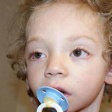

In [30]:
from PIL import Image
path = id_to_filename[train_questions[0]['image_id']]
image = Image.open(path)
image

In [31]:
#!pip install -q git+https://github.com/huggingface/transformers.git

from transformers import ViltProcessor

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")

/home/wud2/miniconda3/envs/LLM/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
import torch
from PIL import Image

class VQADataset(torch.utils.data.Dataset):
    """VQA (v2) dataset."""

    def __init__(self, questions, annotations, processor):
        self.questions = questions
        self.annotations = annotations
        self.processor = processor

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # get image + text - training pairs
        annotation = self.annotations[idx]
        questions = self.questions[idx]
        image = Image.open(id_to_filename[questions['image_id']])
        text = questions['question']
        #send text and image through processor
        encoding = self.processor(image, text, padding="max_length", truncation=True, return_tensors="pt")
        # remove batch dimension
        for k,v in encoding.items():
            encoding[k] = v.squeeze()
        # add labels: true disease & scores: confidence
        labels = annotation['labels']
        scores = annotation['scores']
        # based on: https://github.com/dandelin/ViLT/blob/762fd3975c180db6fc88f577cf39549983fa373a/vilt/modules/objectives.py#L301
        # https://github.com/jnhwkim/ban-vqa/blob/master/train.py#L19
        # targets = [0] * number of disease labels
        targets = torch.zeros(len(id2label))
        for label, score in zip(labels, scores):
              targets[label] = score
        # one-hot encoding in our case
        encoding["labels"] = targets

        return encoding

In [33]:
train_dataset = VQADataset(questions = train_questions,
                     annotations = train_annotations,
                     processor=processor)

In [34]:
type(id2label[0]), type(int(55))

(int, int)

In [35]:
from transformers import ViltForQuestionAnswering
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm",
                                                 num_labels=len(id2label),
                                                 id2label=id2label,
                                                 label2id=label2id)
#PATH = './Model/checkpoint/model.pt'
#model.load_state_dict(torch.load(PATH))
model= nn.DataParallel(model)
model.to(device)

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.weight', 'classifier.1.weight', 'classifier.1.bias', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataParallel(
  (module): ViltForQuestionAnswering(
    (vilt): ViltModel(
      (embeddings): ViltEmbeddings(
        (text_embeddings): TextEmbeddings(
          (word_embeddings): Embedding(30522, 768)
          (position_embeddings): Embedding(40, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (patch_embeddings): ViltPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
        )
        (token_type_embeddings): Embedding(2, 768)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViltEncoder(
        (layer): ModuleList(
          (0-11): 12 x ViltLayer(
            (attention): ViltAttention(
              (attention): ViltSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out

In [36]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  input_ids = [item['input_ids'] for item in batch]
  pixel_values = [item['pixel_values'] for item in batch]
  attention_mask = [item['attention_mask'] for item in batch]
  token_type_ids = [item['token_type_ids'] for item in batch]
  labels = [item['labels'] for item in batch]

  # create padded pixel values and corresponding pixel mask
  encoding = processor.image_processor.pad(pixel_values, return_tensors="pt")

  # create new batch
  batch = {}
  batch['input_ids'] = torch.stack(input_ids)
  batch['attention_mask'] = torch.stack(attention_mask)
  batch['token_type_ids'] = torch.stack(token_type_ids)
  batch['pixel_values'] = encoding['pixel_values']
  batch['pixel_mask'] = encoding['pixel_mask']
  batch['labels'] = torch.stack(labels)

  return batch

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=64, shuffle=True)

In [38]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
model.train()
for epoch in range(10):  # loop over the dataset multiple times
   print(f"Epoch: {epoch}")
   for batch in tqdm(train_dataloader):
        # get the inputs;
        batch = {k:v.to(device) for k,v in batch.items()}

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(**batch)
        loss = outputs.loss.sum()
        print("Loss:", loss.item())
        loss.backward()
        optimizer.step()

Epoch: 0


  0%|          | 1/444 [00:09<1:10:33,  9.56s/it]

Loss: 1.5717294216156006


  0%|          | 2/444 [00:19<1:10:53,  9.62s/it]

Loss: 1.666501760482788


  1%|          | 3/444 [00:27<1:07:40,  9.21s/it]

Loss: 1.489233136177063


  1%|          | 4/444 [00:37<1:07:56,  9.26s/it]

Loss: 1.8649210929870605


  1%|          | 5/444 [00:47<1:08:57,  9.43s/it]

Loss: 2.085294246673584


  1%|▏         | 6/444 [00:56<1:07:47,  9.29s/it]

Loss: 1.4915070533752441


  2%|▏         | 7/444 [01:05<1:07:35,  9.28s/it]

Loss: 1.8547931909561157


  2%|▏         | 8/444 [01:14<1:07:16,  9.26s/it]

Loss: 1.194469690322876


  2%|▏         | 9/444 [01:24<1:08:10,  9.40s/it]

Loss: 2.4529452323913574


  2%|▏         | 10/444 [01:34<1:09:42,  9.64s/it]

Loss: 1.479956865310669


  2%|▏         | 11/444 [01:43<1:08:29,  9.49s/it]

Loss: 1.140195608139038


  3%|▎         | 12/444 [01:53<1:08:19,  9.49s/it]

Loss: 1.7210443019866943


  3%|▎         | 13/444 [02:02<1:08:09,  9.49s/it]

Loss: 1.9541091918945312


  3%|▎         | 14/444 [02:12<1:08:28,  9.55s/it]

Loss: 2.210085391998291


  3%|▎         | 15/444 [02:21<1:08:40,  9.60s/it]

Loss: 1.5645551681518555


  4%|▎         | 16/444 [02:31<1:08:12,  9.56s/it]

Loss: 1.2352511882781982


  4%|▍         | 17/444 [02:40<1:08:06,  9.57s/it]

Loss: 1.7786831855773926


  4%|▍         | 18/444 [02:50<1:07:24,  9.50s/it]

Loss: 1.7625285387039185


  4%|▍         | 19/444 [02:59<1:07:02,  9.46s/it]

Loss: 1.4957642555236816


  5%|▍         | 20/444 [03:08<1:05:20,  9.25s/it]

Loss: 1.2851378917694092


  5%|▍         | 21/444 [03:18<1:06:07,  9.38s/it]

Loss: 1.8947023153305054


  5%|▍         | 22/444 [03:27<1:05:54,  9.37s/it]

Loss: 1.651718258857727


  5%|▌         | 23/444 [03:36<1:05:48,  9.38s/it]

Loss: 1.7140378952026367


  5%|▌         | 24/444 [03:45<1:03:18,  9.04s/it]

Loss: 1.587973952293396


  6%|▌         | 25/444 [03:53<1:02:36,  8.96s/it]

Loss: 1.5810928344726562


  6%|▌         | 26/444 [04:03<1:02:49,  9.02s/it]

Loss: 1.6333694458007812


  6%|▌         | 27/444 [04:12<1:02:30,  8.99s/it]

Loss: 1.365165114402771


  6%|▋         | 28/444 [04:21<1:04:01,  9.24s/it]

Loss: 1.7326936721801758


  7%|▋         | 29/444 [04:31<1:04:33,  9.33s/it]

Loss: 1.5915334224700928


  7%|▋         | 30/444 [04:40<1:04:51,  9.40s/it]

Loss: 1.4756808280944824


  7%|▋         | 31/444 [04:50<1:05:23,  9.50s/it]

Loss: 1.6782429218292236


  7%|▋         | 32/444 [05:00<1:05:55,  9.60s/it]

Loss: 0.6701345443725586


  7%|▋         | 33/444 [05:09<1:04:47,  9.46s/it]

Loss: 1.830421805381775


  8%|▊         | 34/444 [05:19<1:04:50,  9.49s/it]

Loss: 1.7138561010360718


  8%|▊         | 35/444 [05:28<1:04:38,  9.48s/it]

Loss: 1.9507133960723877


  8%|▊         | 36/444 [05:37<1:03:21,  9.32s/it]

Loss: 1.9255986213684082


  8%|▊         | 37/444 [05:46<1:03:09,  9.31s/it]

Loss: 2.258363723754883


  9%|▊         | 38/444 [05:56<1:03:45,  9.42s/it]

Loss: 1.8356221914291382


  9%|▉         | 39/444 [06:05<1:02:47,  9.30s/it]

Loss: 2.067694664001465


  9%|▉         | 40/444 [06:14<1:01:10,  9.08s/it]

Loss: 2.072011947631836


  9%|▉         | 41/444 [06:23<1:01:45,  9.19s/it]

Loss: 1.6945161819458008


  9%|▉         | 42/444 [06:33<1:02:14,  9.29s/it]

Loss: 0.8762614727020264


 10%|▉         | 43/444 [06:42<1:02:08,  9.30s/it]

Loss: 2.1132378578186035


 10%|▉         | 44/444 [06:51<1:01:43,  9.26s/it]

Loss: 1.8810995817184448


 10%|█         | 45/444 [07:01<1:02:31,  9.40s/it]

Loss: 1.3067771196365356


 10%|█         | 46/444 [07:10<1:01:59,  9.35s/it]

Loss: 1.3205273151397705


 11%|█         | 47/444 [07:19<1:01:24,  9.28s/it]

Loss: 1.7177811861038208


 11%|█         | 48/444 [07:29<1:01:45,  9.36s/it]

Loss: 1.8319791555404663


 11%|█         | 49/444 [07:38<1:01:44,  9.38s/it]

Loss: 1.9805233478546143


 11%|█▏        | 50/444 [07:47<1:01:19,  9.34s/it]

Loss: 1.7134660482406616


 11%|█▏        | 51/444 [07:56<1:00:10,  9.19s/it]

Loss: 1.3853306770324707


 12%|█▏        | 52/444 [08:06<1:01:53,  9.47s/it]

Loss: 1.1238579750061035


 12%|█▏        | 53/444 [08:16<1:01:19,  9.41s/it]

Loss: 1.1411590576171875


 12%|█▏        | 54/444 [08:25<1:01:29,  9.46s/it]

Loss: 2.3790440559387207


 12%|█▏        | 55/444 [08:34<59:53,  9.24s/it]  

Loss: 1.5360093116760254


 13%|█▎        | 56/444 [08:43<1:00:16,  9.32s/it]

Loss: 1.0319960117340088


 13%|█▎        | 57/444 [08:53<1:00:45,  9.42s/it]

Loss: 1.572540044784546


 13%|█▎        | 58/444 [09:03<1:01:20,  9.54s/it]

Loss: 1.5743000507354736


 13%|█▎        | 59/444 [09:12<1:00:58,  9.50s/it]

Loss: 1.6705503463745117


 14%|█▎        | 60/444 [09:23<1:02:19,  9.74s/it]

Loss: 1.298796534538269


 14%|█▎        | 61/444 [09:32<1:01:30,  9.64s/it]

Loss: 1.0943185091018677


 14%|█▍        | 62/444 [09:40<58:58,  9.26s/it]  

Loss: 1.5185202360153198


 14%|█▍        | 63/444 [09:50<58:41,  9.24s/it]

Loss: 1.7300760746002197


 14%|█▍        | 64/444 [09:59<58:52,  9.30s/it]

Loss: 1.5504703521728516


 15%|█▍        | 65/444 [10:09<1:00:26,  9.57s/it]

Loss: 1.6839492321014404


 15%|█▍        | 66/444 [10:18<59:31,  9.45s/it]  

Loss: 1.3179997205734253


 15%|█▌        | 67/444 [10:27<58:28,  9.31s/it]

Loss: 1.957423448562622


 15%|█▌        | 68/444 [10:36<57:23,  9.16s/it]

Loss: 1.9430723190307617


 16%|█▌        | 69/444 [10:46<57:47,  9.25s/it]

Loss: 1.0355095863342285


 16%|█▌        | 70/444 [10:55<57:16,  9.19s/it]

Loss: 1.254485011100769


 16%|█▌        | 71/444 [11:04<57:55,  9.32s/it]

Loss: 1.407869815826416


 16%|█▌        | 72/444 [11:14<57:55,  9.34s/it]

Loss: 1.7532222270965576


 16%|█▋        | 73/444 [11:23<57:37,  9.32s/it]

Loss: 1.240297794342041


 17%|█▋        | 74/444 [11:32<56:44,  9.20s/it]

Loss: 1.7400336265563965


 17%|█▋        | 75/444 [11:41<55:54,  9.09s/it]

Loss: 1.53275465965271


 17%|█▋        | 76/444 [11:50<56:47,  9.26s/it]

Loss: 1.0241113901138306


 17%|█▋        | 77/444 [11:59<56:00,  9.16s/it]

Loss: 2.1366281509399414


 18%|█▊        | 78/444 [12:08<55:54,  9.17s/it]

Loss: 1.699721097946167


 18%|█▊        | 79/444 [12:18<56:06,  9.22s/it]

Loss: 1.7219128608703613


 18%|█▊        | 80/444 [12:28<56:56,  9.38s/it]

Loss: 1.27556312084198


 18%|█▊        | 81/444 [12:37<56:33,  9.35s/it]

Loss: 1.1231226921081543


 18%|█▊        | 82/444 [12:46<56:26,  9.35s/it]

Loss: 1.3685628175735474


 19%|█▊        | 83/444 [12:56<56:32,  9.40s/it]

Loss: 1.5741043090820312


 19%|█▉        | 84/444 [13:06<57:09,  9.53s/it]

Loss: 1.3961267471313477


 19%|█▉        | 85/444 [13:15<56:44,  9.48s/it]

Loss: 1.5099632740020752


 19%|█▉        | 86/444 [13:24<56:40,  9.50s/it]

Loss: 1.305288553237915


 20%|█▉        | 87/444 [13:34<56:46,  9.54s/it]

Loss: 1.5017046928405762


 20%|█▉        | 88/444 [13:43<56:04,  9.45s/it]

Loss: 1.8284512758255005


 20%|██        | 89/444 [13:53<56:37,  9.57s/it]

Loss: 1.5957233905792236


 20%|██        | 90/444 [14:03<56:37,  9.60s/it]

Loss: 1.557237982749939


 20%|██        | 91/444 [14:12<55:53,  9.50s/it]

Loss: 1.1794317960739136


 21%|██        | 92/444 [14:21<55:24,  9.44s/it]

Loss: 1.4442288875579834


 21%|██        | 93/444 [14:31<56:06,  9.59s/it]

Loss: 2.1317477226257324


 21%|██        | 94/444 [14:41<56:33,  9.70s/it]

Loss: 1.7355879545211792


 21%|██▏       | 95/444 [14:51<55:37,  9.56s/it]

Loss: 1.9657889604568481


 22%|██▏       | 96/444 [15:00<54:48,  9.45s/it]

Loss: 1.4415735006332397


 22%|██▏       | 97/444 [15:09<54:48,  9.48s/it]

Loss: 1.0943312644958496


 22%|██▏       | 98/444 [15:18<53:22,  9.26s/it]

Loss: 1.239701747894287


 22%|██▏       | 99/444 [15:27<53:12,  9.25s/it]

Loss: 2.7499804496765137


 23%|██▎       | 100/444 [15:37<53:30,  9.33s/it]

Loss: 1.9128706455230713


 23%|██▎       | 101/444 [15:46<52:54,  9.25s/it]

Loss: 1.990180492401123


 23%|██▎       | 102/444 [15:55<52:59,  9.30s/it]

Loss: 2.0832014083862305


 23%|██▎       | 103/444 [16:05<53:42,  9.45s/it]

Loss: 1.842036247253418


 23%|██▎       | 104/444 [16:14<53:20,  9.41s/it]

Loss: 1.4733413457870483


 24%|██▎       | 105/444 [16:24<53:00,  9.38s/it]

Loss: 1.6369612216949463


 24%|██▍       | 106/444 [16:33<52:53,  9.39s/it]

Loss: 0.8916778564453125


 24%|██▍       | 107/444 [16:42<52:05,  9.27s/it]

Loss: 1.9241607189178467


 24%|██▍       | 108/444 [16:52<52:19,  9.34s/it]

Loss: 1.2704944610595703


 25%|██▍       | 109/444 [17:01<51:37,  9.24s/it]

Loss: 2.0497140884399414


 25%|██▍       | 110/444 [17:10<51:51,  9.32s/it]

Loss: 0.9575967788696289


 25%|██▌       | 111/444 [17:20<52:31,  9.46s/it]

Loss: 1.2928190231323242


 25%|██▌       | 112/444 [17:29<51:40,  9.34s/it]

Loss: 1.264108657836914


 25%|██▌       | 113/444 [17:39<52:21,  9.49s/it]

Loss: 1.4992797374725342


 26%|██▌       | 114/444 [17:48<51:27,  9.36s/it]

Loss: 2.1328110694885254


 26%|██▌       | 115/444 [17:58<52:07,  9.51s/it]

Loss: 1.6296825408935547


 26%|██▌       | 116/444 [18:07<50:56,  9.32s/it]

Loss: 1.7379515171051025


 26%|██▋       | 117/444 [18:16<51:15,  9.40s/it]

Loss: 1.1638879776000977


 27%|██▋       | 118/444 [18:26<51:05,  9.40s/it]

Loss: 1.2072088718414307


 27%|██▋       | 119/444 [18:35<51:16,  9.47s/it]

Loss: 0.8321449160575867


 27%|██▋       | 120/444 [18:45<50:57,  9.44s/it]

Loss: 1.9058630466461182


 27%|██▋       | 121/444 [18:54<50:39,  9.41s/it]

Loss: 1.3514416217803955


 27%|██▋       | 122/444 [19:04<50:45,  9.46s/it]

Loss: 1.9063999652862549


 28%|██▊       | 123/444 [19:13<50:57,  9.52s/it]

Loss: 1.1583411693572998


 28%|██▊       | 124/444 [19:23<50:27,  9.46s/it]

Loss: 1.310997486114502


 28%|██▊       | 125/444 [19:31<49:20,  9.28s/it]

Loss: 1.2469459772109985


 28%|██▊       | 126/444 [19:40<48:32,  9.16s/it]

Loss: 2.0346250534057617


 29%|██▊       | 127/444 [19:50<48:37,  9.20s/it]

Loss: 2.107149124145508


 29%|██▉       | 128/444 [19:59<48:45,  9.26s/it]

Loss: 1.0255768299102783


 29%|██▉       | 129/444 [20:08<49:03,  9.34s/it]

Loss: 1.153174638748169


 29%|██▉       | 130/444 [20:18<49:18,  9.42s/it]

Loss: 1.0897046327590942


 30%|██▉       | 131/444 [20:28<49:28,  9.49s/it]

Loss: 1.3649568557739258


 30%|██▉       | 132/444 [20:37<49:26,  9.51s/it]

Loss: 2.4719150066375732


 30%|██▉       | 133/444 [20:46<48:12,  9.30s/it]

Loss: 1.3066766262054443


 30%|███       | 134/444 [20:55<47:39,  9.22s/it]

Loss: 1.4390788078308105


 30%|███       | 135/444 [21:04<47:36,  9.24s/it]

Loss: 0.7564447522163391


 31%|███       | 136/444 [21:14<47:39,  9.28s/it]

Loss: 1.0427510738372803


 31%|███       | 137/444 [21:23<47:34,  9.30s/it]

Loss: 1.298586368560791


 31%|███       | 138/444 [21:33<47:49,  9.38s/it]

Loss: 1.2111985683441162


 31%|███▏      | 139/444 [21:42<48:14,  9.49s/it]

Loss: 1.0896726846694946


 32%|███▏      | 140/444 [21:52<48:00,  9.48s/it]

Loss: 1.3141604661941528


 32%|███▏      | 141/444 [22:02<48:26,  9.59s/it]

Loss: 1.5974212884902954


 32%|███▏      | 142/444 [22:10<46:38,  9.26s/it]

Loss: 1.9289648532867432


 32%|███▏      | 143/444 [22:20<46:32,  9.28s/it]

Loss: 1.300458550453186


 32%|███▏      | 144/444 [22:29<46:34,  9.32s/it]

Loss: 1.446033239364624


 33%|███▎      | 145/444 [22:38<46:25,  9.32s/it]

Loss: 1.0642672777175903


 33%|███▎      | 146/444 [22:47<45:57,  9.25s/it]

Loss: 1.2289624214172363


 33%|███▎      | 147/444 [22:57<46:24,  9.37s/it]

Loss: 1.1939321756362915


 33%|███▎      | 148/444 [23:07<47:23,  9.61s/it]

Loss: 1.4956755638122559


 34%|███▎      | 149/444 [23:16<46:26,  9.45s/it]

Loss: 1.9695180654525757


 34%|███▍      | 150/444 [23:26<46:59,  9.59s/it]

Loss: 1.4687752723693848


 34%|███▍      | 151/444 [23:35<46:15,  9.47s/it]

Loss: 1.94130277633667


 34%|███▍      | 152/444 [23:45<46:18,  9.51s/it]

Loss: 1.8839998245239258
Loss: 1.4963874816894531


 35%|███▍      | 154/444 [24:04<46:04,  9.53s/it]

Loss: 1.437760829925537


 35%|███▍      | 155/444 [24:13<45:24,  9.43s/it]

Loss: 1.578398585319519


 35%|███▌      | 156/444 [24:23<44:49,  9.34s/it]

Loss: 1.3281536102294922


 35%|███▌      | 157/444 [24:33<45:56,  9.60s/it]

Loss: 1.3842207193374634


 36%|███▌      | 158/444 [24:42<45:11,  9.48s/it]

Loss: 0.9649107456207275


 36%|███▌      | 159/444 [24:51<44:54,  9.45s/it]

Loss: 1.3169676065444946


 36%|███▌      | 160/444 [25:01<44:23,  9.38s/it]

Loss: 1.8702300786972046


 36%|███▋      | 161/444 [25:10<43:59,  9.33s/it]

Loss: 1.691694974899292


 36%|███▋      | 162/444 [25:19<43:41,  9.30s/it]

Loss: 1.513195276260376


 37%|███▋      | 163/444 [25:28<43:25,  9.27s/it]

Loss: 1.2731244564056396


 37%|███▋      | 164/444 [25:37<42:29,  9.11s/it]

Loss: 1.3063141107559204


 37%|███▋      | 165/444 [25:46<43:00,  9.25s/it]

Loss: 1.3853492736816406


 37%|███▋      | 166/444 [25:56<43:13,  9.33s/it]

Loss: 1.0494863986968994


 38%|███▊      | 167/444 [26:05<42:54,  9.29s/it]

Loss: 1.2546446323394775


 38%|███▊      | 168/444 [26:15<43:13,  9.40s/it]

Loss: 1.1757349967956543


 38%|███▊      | 169/444 [26:24<43:00,  9.38s/it]

Loss: 1.0241551399230957


 38%|███▊      | 170/444 [26:34<42:59,  9.42s/it]

Loss: 1.622360110282898


 39%|███▊      | 171/444 [26:43<42:28,  9.34s/it]

Loss: 1.307794213294983


 39%|███▊      | 172/444 [26:53<42:54,  9.46s/it]

Loss: 2.093837261199951


 39%|███▉      | 173/444 [27:02<42:46,  9.47s/it]

Loss: 1.2938475608825684


 39%|███▉      | 174/444 [27:11<42:24,  9.42s/it]

Loss: 1.0737321376800537


 39%|███▉      | 175/444 [27:21<42:10,  9.41s/it]

Loss: 1.1804656982421875


 40%|███▉      | 176/444 [27:30<41:36,  9.32s/it]

Loss: 1.012574315071106


 40%|███▉      | 177/444 [27:39<41:19,  9.29s/it]

Loss: 1.816885232925415


 40%|████      | 178/444 [27:49<42:12,  9.52s/it]

Loss: 1.1468614339828491


 40%|████      | 179/444 [27:58<41:17,  9.35s/it]

Loss: 1.4675705432891846


 41%|████      | 180/444 [28:07<40:59,  9.32s/it]

Loss: 2.512796640396118


 41%|████      | 181/444 [28:17<41:14,  9.41s/it]

Loss: 1.491124153137207


 41%|████      | 182/444 [28:26<40:46,  9.34s/it]

Loss: 0.9704439043998718


 41%|████      | 183/444 [28:35<40:30,  9.31s/it]

Loss: 1.5592052936553955


 41%|████▏     | 184/444 [28:45<40:41,  9.39s/it]

Loss: 2.5729565620422363


 42%|████▏     | 185/444 [28:54<40:29,  9.38s/it]

Loss: 1.1791071891784668


 42%|████▏     | 186/444 [29:04<40:49,  9.50s/it]

Loss: 1.4831428527832031


 42%|████▏     | 187/444 [29:14<41:13,  9.62s/it]

Loss: 1.0174227952957153


 42%|████▏     | 188/444 [29:23<40:25,  9.47s/it]

Loss: 1.2475528717041016


 43%|████▎     | 189/444 [29:32<39:35,  9.31s/it]

Loss: 0.8690115809440613


 43%|████▎     | 190/444 [29:42<39:41,  9.38s/it]

Loss: 0.8190476894378662


 43%|████▎     | 191/444 [29:51<39:37,  9.40s/it]

Loss: 0.9984679222106934


 43%|████▎     | 192/444 [30:00<39:25,  9.39s/it]

Loss: 0.8897650837898254


 43%|████▎     | 193/444 [30:10<39:29,  9.44s/it]

Loss: 2.167646884918213


 44%|████▎     | 194/444 [30:19<39:14,  9.42s/it]

Loss: 1.3330278396606445


 44%|████▍     | 195/444 [30:29<39:46,  9.58s/it]

Loss: 1.460680365562439


 44%|████▍     | 196/444 [30:38<39:03,  9.45s/it]

Loss: 2.025510311126709


 44%|████▍     | 197/444 [30:47<38:01,  9.24s/it]

Loss: 1.6437199115753174


 45%|████▍     | 198/444 [30:56<37:31,  9.15s/it]

Loss: 1.4894204139709473


 45%|████▍     | 199/444 [31:05<37:11,  9.11s/it]

Loss: 1.9780211448669434


 45%|████▌     | 200/444 [31:15<37:58,  9.34s/it]

Loss: 1.6403894424438477


 45%|████▌     | 201/444 [31:24<37:32,  9.27s/it]

Loss: 2.3402650356292725


 45%|████▌     | 202/444 [31:33<37:10,  9.22s/it]

Loss: 0.9676898717880249


 46%|████▌     | 203/444 [31:43<37:36,  9.36s/it]

Loss: 2.402963876724243


 46%|████▌     | 204/444 [31:52<37:13,  9.31s/it]

Loss: 1.7758537530899048


 46%|████▌     | 205/444 [32:01<36:34,  9.18s/it]

Loss: 1.867814540863037


 46%|████▋     | 206/444 [32:11<36:48,  9.28s/it]

Loss: 0.8359649181365967


 47%|████▋     | 207/444 [32:20<36:40,  9.29s/it]

Loss: 1.7073702812194824


 47%|████▋     | 208/444 [32:30<37:13,  9.46s/it]

Loss: 1.545212745666504


 47%|████▋     | 209/444 [32:39<36:59,  9.45s/it]

Loss: 1.4294800758361816


 47%|████▋     | 210/444 [32:50<38:03,  9.76s/it]

Loss: 1.5507280826568604


 48%|████▊     | 211/444 [32:59<37:26,  9.64s/it]

Loss: 1.1618716716766357


 48%|████▊     | 212/444 [33:09<37:16,  9.64s/it]

Loss: 1.1479305028915405


 48%|████▊     | 213/444 [33:18<36:21,  9.44s/it]

Loss: 0.877727746963501


 48%|████▊     | 214/444 [33:27<36:26,  9.51s/it]

Loss: 0.8769783973693848


 48%|████▊     | 215/444 [33:36<35:24,  9.28s/it]

Loss: 0.9815041422843933


 49%|████▊     | 216/444 [33:45<35:29,  9.34s/it]

Loss: 1.7307655811309814


 49%|████▉     | 217/444 [33:55<35:51,  9.48s/it]

Loss: 2.229933023452759


 49%|████▉     | 218/444 [34:05<36:17,  9.64s/it]

Loss: 2.184202194213867


 49%|████▉     | 219/444 [34:14<35:38,  9.51s/it]

Loss: 1.5674700736999512


 50%|████▉     | 220/444 [34:24<35:18,  9.46s/it]

Loss: 1.6064095497131348


 50%|████▉     | 221/444 [34:33<35:12,  9.47s/it]

Loss: 1.7122321128845215


 50%|█████     | 222/444 [34:43<35:11,  9.51s/it]

Loss: 1.449326515197754


 50%|█████     | 223/444 [34:53<35:09,  9.55s/it]

Loss: 1.3511042594909668


 50%|█████     | 224/444 [35:02<34:51,  9.51s/it]

Loss: 1.3528523445129395


 51%|█████     | 225/444 [35:11<34:03,  9.33s/it]

Loss: 1.2093064785003662


 51%|█████     | 226/444 [35:20<33:53,  9.33s/it]

Loss: 1.630307912826538


 51%|█████     | 227/444 [35:29<33:31,  9.27s/it]

Loss: 1.409982681274414


 51%|█████▏    | 228/444 [35:39<33:29,  9.30s/it]

Loss: 1.0690641403198242


 52%|█████▏    | 229/444 [35:48<32:54,  9.18s/it]

Loss: 1.6538596153259277


 52%|█████▏    | 230/444 [35:57<33:13,  9.31s/it]

Loss: 1.4429789781570435


 52%|█████▏    | 231/444 [36:07<33:17,  9.38s/it]

Loss: 1.7058433294296265


 52%|█████▏    | 232/444 [36:16<33:10,  9.39s/it]

Loss: 1.2431435585021973


 52%|█████▏    | 233/444 [36:26<33:26,  9.51s/it]

Loss: 2.149594306945801


 53%|█████▎    | 234/444 [36:35<32:44,  9.36s/it]

Loss: 1.8034796714782715


 53%|█████▎    | 235/444 [36:44<32:25,  9.31s/it]

Loss: 1.0581574440002441


 53%|█████▎    | 236/444 [36:54<32:57,  9.51s/it]

Loss: 1.7910397052764893


 53%|█████▎    | 237/444 [37:03<32:19,  9.37s/it]

Loss: 1.4339476823806763


 54%|█████▎    | 238/444 [37:13<32:21,  9.43s/it]

Loss: 2.005324363708496


 54%|█████▍    | 239/444 [37:22<32:27,  9.50s/it]

Loss: 1.4116127490997314


 54%|█████▍    | 240/444 [37:32<32:00,  9.42s/it]

Loss: 1.263139009475708


 54%|█████▍    | 241/444 [37:41<31:55,  9.44s/it]

Loss: 1.3327345848083496


 55%|█████▍    | 242/444 [37:50<31:36,  9.39s/it]

Loss: 1.3465677499771118


 55%|█████▍    | 243/444 [38:00<31:38,  9.44s/it]

Loss: 2.1145880222320557


 55%|█████▍    | 244/444 [38:09<31:21,  9.41s/it]

Loss: 1.854332685470581


 55%|█████▌    | 245/444 [38:19<31:30,  9.50s/it]

Loss: 1.384596347808838


 55%|█████▌    | 246/444 [38:28<31:05,  9.42s/it]

Loss: 1.1809203624725342


 56%|█████▌    | 247/444 [38:38<31:31,  9.60s/it]

Loss: 1.4108469486236572


 56%|█████▌    | 248/444 [38:48<31:14,  9.56s/it]

Loss: 1.1149334907531738


 56%|█████▌    | 249/444 [38:57<30:39,  9.43s/it]

Loss: 1.9361037015914917


 56%|█████▋    | 250/444 [39:06<30:13,  9.35s/it]

Loss: 1.0990321636199951


 57%|█████▋    | 251/444 [39:16<30:18,  9.42s/it]

Loss: 1.674323558807373


 57%|█████▋    | 252/444 [39:25<30:10,  9.43s/it]

Loss: 1.1747560501098633


 57%|█████▋    | 253/444 [39:35<30:44,  9.66s/it]

Loss: 0.7803402543067932


 57%|█████▋    | 254/444 [39:45<30:36,  9.66s/it]

Loss: 1.829787015914917


 57%|█████▋    | 255/444 [39:55<30:21,  9.64s/it]

Loss: 1.2542442083358765


 58%|█████▊    | 256/444 [40:03<28:57,  9.24s/it]

Loss: 1.5996400117874146


 58%|█████▊    | 257/444 [40:12<28:38,  9.19s/it]

Loss: 1.7546935081481934


 58%|█████▊    | 258/444 [40:21<28:22,  9.15s/it]

Loss: 1.6172871589660645


 58%|█████▊    | 259/444 [40:30<28:30,  9.24s/it]

Loss: 1.6204583644866943


 59%|█████▊    | 260/444 [40:40<28:34,  9.32s/it]

Loss: 1.330379843711853


 59%|█████▉    | 261/444 [40:50<28:44,  9.42s/it]

Loss: 1.4978790283203125


 59%|█████▉    | 262/444 [40:59<28:15,  9.32s/it]

Loss: 1.9362826347351074


 59%|█████▉    | 263/444 [41:08<27:59,  9.28s/it]

Loss: 1.0089879035949707


 59%|█████▉    | 264/444 [41:17<27:44,  9.25s/it]

Loss: 0.8127327561378479


 60%|█████▉    | 265/444 [41:26<27:40,  9.28s/it]

Loss: 0.8657280206680298


 60%|█████▉    | 266/444 [41:35<27:22,  9.23s/it]

Loss: 1.866554617881775


 60%|██████    | 267/444 [41:45<27:07,  9.19s/it]

Loss: 1.4150632619857788


 60%|██████    | 268/444 [41:54<27:09,  9.26s/it]

Loss: 1.5024089813232422


 61%|██████    | 269/444 [42:04<27:23,  9.39s/it]

Loss: 1.766679048538208


 61%|██████    | 270/444 [42:13<27:13,  9.39s/it]

Loss: 0.944238007068634


 61%|██████    | 271/444 [42:23<27:19,  9.48s/it]

Loss: 2.0503225326538086


 61%|██████▏   | 272/444 [42:32<27:00,  9.42s/it]

Loss: 1.8734549283981323


 61%|██████▏   | 273/444 [42:41<26:31,  9.31s/it]

Loss: 1.5571541786193848


 62%|██████▏   | 274/444 [42:51<26:49,  9.47s/it]

Loss: 0.7703025341033936


 62%|██████▏   | 275/444 [43:01<27:03,  9.61s/it]

Loss: 1.0500805377960205


 62%|██████▏   | 276/444 [43:11<27:11,  9.71s/it]

Loss: 1.3595771789550781


 62%|██████▏   | 277/444 [43:20<26:56,  9.68s/it]

Loss: 1.468482255935669


 63%|██████▎   | 278/444 [43:30<26:44,  9.67s/it]

Loss: 2.07344388961792


 63%|██████▎   | 279/444 [43:40<26:42,  9.71s/it]

Loss: 1.4038898944854736


 63%|██████▎   | 280/444 [43:49<26:06,  9.55s/it]

Loss: 1.3039637804031372


 63%|██████▎   | 281/444 [43:58<25:48,  9.50s/it]

Loss: 1.2978160381317139


 64%|██████▎   | 282/444 [44:08<25:44,  9.53s/it]

Loss: 0.9693458080291748


 64%|██████▎   | 283/444 [44:18<25:45,  9.60s/it]

Loss: 1.4932737350463867


 64%|██████▍   | 284/444 [44:27<25:31,  9.57s/it]

Loss: 1.8359743356704712


 64%|██████▍   | 285/444 [44:37<25:06,  9.48s/it]

Loss: 2.0862491130828857


 64%|██████▍   | 286/444 [44:46<24:55,  9.46s/it]

Loss: 1.2258316278457642


 65%|██████▍   | 287/444 [44:55<24:38,  9.42s/it]

Loss: 1.1909654140472412


 65%|██████▍   | 288/444 [45:05<24:40,  9.49s/it]

Loss: 1.5714027881622314


 65%|██████▌   | 289/444 [45:14<24:17,  9.40s/it]

Loss: 1.6964013576507568


 65%|██████▌   | 290/444 [45:23<23:48,  9.28s/it]

Loss: 0.8743547201156616


 66%|██████▌   | 291/444 [45:33<23:51,  9.36s/it]

Loss: 0.4801989793777466


 66%|██████▌   | 292/444 [45:43<24:27,  9.65s/it]

Loss: 0.4780442416667938


 66%|██████▌   | 293/444 [45:53<24:18,  9.66s/it]

Loss: 1.4191241264343262


 66%|██████▌   | 294/444 [46:03<24:39,  9.86s/it]

Loss: 1.5045753717422485


 66%|██████▋   | 295/444 [46:13<24:25,  9.83s/it]

Loss: 1.1063179969787598


 67%|██████▋   | 296/444 [46:22<23:30,  9.53s/it]

Loss: 1.151451587677002


 67%|██████▋   | 297/444 [46:31<23:09,  9.45s/it]

Loss: 1.6106367111206055


 67%|██████▋   | 298/444 [46:40<23:02,  9.47s/it]

Loss: 0.8841613531112671


 67%|██████▋   | 299/444 [46:50<22:49,  9.45s/it]

Loss: 1.586181640625


 68%|██████▊   | 300/444 [46:58<22:05,  9.20s/it]

Loss: 1.2309494018554688


 68%|██████▊   | 301/444 [47:08<22:09,  9.30s/it]

Loss: 1.5399935245513916


 68%|██████▊   | 302/444 [47:17<21:40,  9.16s/it]

Loss: 1.286647081375122


 68%|██████▊   | 303/444 [47:26<21:28,  9.14s/it]

Loss: 0.9279041886329651


 68%|██████▊   | 304/444 [47:35<21:25,  9.18s/it]

Loss: 2.4977264404296875


 69%|██████▊   | 305/444 [47:44<21:07,  9.12s/it]

Loss: 1.1096522808074951


 69%|██████▉   | 306/444 [47:54<21:14,  9.23s/it]

Loss: 2.4466428756713867


 69%|██████▉   | 307/444 [48:04<21:39,  9.48s/it]

Loss: 1.7601797580718994


 69%|██████▉   | 308/444 [48:13<21:06,  9.31s/it]

Loss: 1.78043532371521


 70%|██████▉   | 309/444 [48:23<21:19,  9.48s/it]

Loss: 0.9493926763534546


 70%|██████▉   | 310/444 [48:32<21:15,  9.52s/it]

Loss: 0.9350175857543945


 70%|███████   | 311/444 [48:42<21:10,  9.55s/it]

Loss: 1.328200101852417


 70%|███████   | 312/444 [48:52<21:11,  9.63s/it]

Loss: 1.1358331441879272


 70%|███████   | 313/444 [49:01<20:52,  9.56s/it]

Loss: 1.1104894876480103


 71%|███████   | 314/444 [49:10<20:07,  9.29s/it]

Loss: 1.167353630065918


 71%|███████   | 315/444 [49:19<20:14,  9.42s/it]

Loss: 1.1290415525436401


 71%|███████   | 316/444 [49:29<20:03,  9.40s/it]

Loss: 1.5618007183074951


 71%|███████▏  | 317/444 [49:38<19:52,  9.39s/it]

Loss: 1.0887060165405273


 72%|███████▏  | 318/444 [49:48<20:15,  9.64s/it]

Loss: 1.733381748199463


 72%|███████▏  | 319/444 [49:58<20:04,  9.63s/it]

Loss: 0.8707056045532227


 72%|███████▏  | 320/444 [50:07<19:33,  9.46s/it]

Loss: 1.5984165668487549


 72%|███████▏  | 321/444 [50:17<19:36,  9.56s/it]

Loss: 1.4404997825622559


 73%|███████▎  | 322/444 [50:27<19:37,  9.65s/it]

Loss: 0.881537914276123


 73%|███████▎  | 323/444 [50:36<19:26,  9.64s/it]

Loss: 1.4280799627304077


 73%|███████▎  | 324/444 [50:46<19:03,  9.53s/it]

Loss: 1.2798478603363037


 73%|███████▎  | 325/444 [50:55<18:52,  9.51s/it]

Loss: 1.3634557723999023


 73%|███████▎  | 326/444 [51:04<18:22,  9.34s/it]

Loss: 0.6432151794433594


 74%|███████▎  | 327/444 [51:14<18:35,  9.54s/it]

Loss: 1.0000561475753784


 74%|███████▍  | 328/444 [51:23<18:01,  9.32s/it]

Loss: 1.212636947631836


 74%|███████▍  | 329/444 [51:32<17:44,  9.26s/it]

Loss: 1.0805163383483887


 74%|███████▍  | 330/444 [51:41<17:33,  9.24s/it]

Loss: 1.5534087419509888


 75%|███████▍  | 331/444 [51:51<17:49,  9.47s/it]

Loss: 1.3218138217926025


 75%|███████▍  | 332/444 [52:00<17:21,  9.30s/it]

Loss: 0.9395933151245117


 75%|███████▌  | 333/444 [52:09<17:13,  9.31s/it]

Loss: 1.190107822418213


 75%|███████▌  | 334/444 [52:19<17:01,  9.29s/it]

Loss: 1.0148227214813232


 75%|███████▌  | 335/444 [52:28<16:48,  9.25s/it]

Loss: 1.2400202751159668


 76%|███████▌  | 336/444 [52:37<16:54,  9.40s/it]

Loss: 0.8640656471252441


 76%|███████▌  | 337/444 [52:47<16:37,  9.32s/it]

Loss: 1.1505001783370972


 76%|███████▌  | 338/444 [52:56<16:29,  9.33s/it]

Loss: 1.0818655490875244


 76%|███████▋  | 339/444 [53:06<16:34,  9.47s/it]

Loss: 0.4918857216835022


 77%|███████▋  | 340/444 [53:15<16:29,  9.51s/it]

Loss: 0.9738523960113525


 77%|███████▋  | 341/444 [53:25<16:31,  9.62s/it]

Loss: 0.6264995336532593


 77%|███████▋  | 342/444 [53:35<16:18,  9.59s/it]

Loss: 0.8728297352790833


 77%|███████▋  | 343/444 [53:44<16:01,  9.52s/it]

Loss: 1.900694489479065


 77%|███████▋  | 344/444 [53:53<15:39,  9.39s/it]

Loss: 1.188500165939331


 78%|███████▊  | 345/444 [54:03<15:36,  9.46s/it]

Loss: 1.5465397834777832


 78%|███████▊  | 346/444 [54:13<15:53,  9.73s/it]

Loss: 1.189235806465149


 78%|███████▊  | 347/444 [54:23<15:45,  9.75s/it]

Loss: 1.222008228302002


 78%|███████▊  | 348/444 [54:32<15:27,  9.66s/it]

Loss: 0.586456298828125


 79%|███████▊  | 349/444 [54:42<15:11,  9.59s/it]

Loss: 1.9611856937408447


 79%|███████▉  | 350/444 [54:52<15:27,  9.87s/it]

Loss: 0.8554669618606567


 79%|███████▉  | 351/444 [55:02<15:12,  9.81s/it]

Loss: 1.7969881296157837


 79%|███████▉  | 352/444 [55:12<15:18,  9.98s/it]

Loss: 0.9733762741088867


 80%|███████▉  | 353/444 [55:22<14:50,  9.79s/it]

Loss: 1.2548093795776367


 80%|███████▉  | 354/444 [55:31<14:31,  9.68s/it]

Loss: 1.524717926979065


 80%|███████▉  | 355/444 [55:40<14:11,  9.57s/it]

Loss: 1.6027588844299316


 80%|████████  | 356/444 [55:50<14:10,  9.66s/it]

Loss: 0.7095803022384644


 80%|████████  | 357/444 [56:00<13:49,  9.53s/it]

Loss: 1.3789247274398804


 81%|████████  | 358/444 [56:09<13:35,  9.48s/it]

Loss: 1.3212132453918457


 81%|████████  | 359/444 [56:18<13:25,  9.48s/it]

Loss: 1.2683824300765991


 81%|████████  | 360/444 [56:28<13:15,  9.48s/it]

Loss: 1.1435892581939697


 81%|████████▏ | 361/444 [56:37<12:49,  9.27s/it]

Loss: 1.1392297744750977


 82%|████████▏ | 362/444 [56:46<12:40,  9.27s/it]

Loss: 1.7893033027648926


 82%|████████▏ | 363/444 [56:55<12:19,  9.13s/it]

Loss: 0.9896419048309326


 82%|████████▏ | 364/444 [57:04<12:24,  9.30s/it]

Loss: 1.1657195091247559


 82%|████████▏ | 365/444 [57:13<11:58,  9.09s/it]

Loss: 1.8012326955795288


 82%|████████▏ | 366/444 [57:22<11:44,  9.03s/it]

Loss: 0.8258421421051025


 83%|████████▎ | 367/444 [57:32<11:52,  9.25s/it]

Loss: 1.525727391242981


 83%|████████▎ | 368/444 [57:41<11:33,  9.12s/it]

Loss: 1.5328788757324219


 83%|████████▎ | 369/444 [57:50<11:28,  9.19s/it]

Loss: 2.0548176765441895


 83%|████████▎ | 370/444 [57:59<11:27,  9.29s/it]

Loss: 1.2438678741455078


 84%|████████▎ | 371/444 [58:10<11:36,  9.54s/it]

Loss: 1.157159686088562


 84%|████████▍ | 372/444 [58:19<11:16,  9.39s/it]

Loss: 2.1759912967681885


 84%|████████▍ | 373/444 [58:28<11:06,  9.38s/it]

Loss: 0.8606462478637695


 84%|████████▍ | 374/444 [58:37<10:50,  9.30s/it]

Loss: 1.4385039806365967


 84%|████████▍ | 375/444 [58:46<10:37,  9.25s/it]

Loss: 1.3183125257492065


 85%|████████▍ | 376/444 [58:56<10:36,  9.36s/it]

Loss: 1.09425687789917


 85%|████████▍ | 377/444 [59:05<10:21,  9.27s/it]

Loss: 1.2731947898864746


 85%|████████▌ | 378/444 [59:15<10:26,  9.49s/it]

Loss: 1.2407875061035156


 85%|████████▌ | 379/444 [59:25<10:21,  9.56s/it]

Loss: 1.3394334316253662


 86%|████████▌ | 380/444 [59:34<10:01,  9.40s/it]

Loss: 0.9699487686157227


 86%|████████▌ | 381/444 [59:43<09:48,  9.35s/it]

Loss: 1.32585871219635


 86%|████████▌ | 382/444 [59:53<09:46,  9.47s/it]

Loss: 1.3114688396453857


 86%|████████▋ | 383/444 [1:00:02<09:44,  9.58s/it]

Loss: 0.7552123069763184


 86%|████████▋ | 384/444 [1:00:12<09:36,  9.62s/it]

Loss: 1.1946368217468262


 87%|████████▋ | 385/444 [1:00:21<09:21,  9.51s/it]

Loss: 1.332326889038086


 87%|████████▋ | 386/444 [1:00:31<09:20,  9.66s/it]

Loss: 0.8685653805732727


 87%|████████▋ | 387/444 [1:00:41<09:14,  9.73s/it]

Loss: 1.02565336227417


 87%|████████▋ | 388/444 [1:00:51<09:00,  9.65s/it]

Loss: 1.5561821460723877


 88%|████████▊ | 389/444 [1:01:00<08:48,  9.61s/it]

Loss: 0.9317305684089661


 88%|████████▊ | 390/444 [1:01:09<08:31,  9.48s/it]

Loss: 0.5791519284248352


 88%|████████▊ | 391/444 [1:01:19<08:18,  9.40s/it]

Loss: 1.364598274230957


 88%|████████▊ | 392/444 [1:01:28<08:10,  9.43s/it]

Loss: 1.7434089183807373


 89%|████████▊ | 393/444 [1:01:38<08:08,  9.57s/it]

Loss: 1.3301913738250732


 89%|████████▊ | 394/444 [1:01:47<07:53,  9.48s/it]

Loss: 1.0305383205413818


 89%|████████▉ | 395/444 [1:01:57<07:40,  9.40s/it]

Loss: 1.063565731048584


 89%|████████▉ | 396/444 [1:02:05<07:24,  9.26s/it]

Loss: 1.2185202836990356


 89%|████████▉ | 397/444 [1:02:15<07:20,  9.36s/it]

Loss: 0.9189176559448242


 90%|████████▉ | 398/444 [1:02:25<07:13,  9.42s/it]

Loss: 0.701178789138794


 90%|████████▉ | 399/444 [1:02:34<07:03,  9.41s/it]

Loss: 1.0977773666381836


 90%|█████████ | 400/444 [1:02:43<06:50,  9.33s/it]

Loss: 1.611196517944336


 90%|█████████ | 401/444 [1:02:52<06:33,  9.15s/it]

Loss: 1.6474111080169678


 91%|█████████ | 402/444 [1:03:02<06:32,  9.33s/it]

Loss: 1.134977102279663


 91%|█████████ | 403/444 [1:03:11<06:23,  9.35s/it]

Loss: 0.9725203514099121


 91%|█████████ | 404/444 [1:03:21<06:21,  9.53s/it]

Loss: 1.0677469968795776


 91%|█████████ | 405/444 [1:03:31<06:19,  9.72s/it]

Loss: 1.0591540336608887


 91%|█████████▏| 406/444 [1:03:40<06:03,  9.56s/it]

Loss: 0.5468470454216003


 92%|█████████▏| 407/444 [1:03:50<05:54,  9.57s/it]

Loss: 1.0294756889343262


 92%|█████████▏| 408/444 [1:04:00<05:44,  9.58s/it]

Loss: 0.8116084337234497


 92%|█████████▏| 409/444 [1:04:09<05:36,  9.63s/it]

Loss: 1.0080032348632812


 92%|█████████▏| 410/444 [1:04:19<05:28,  9.67s/it]

Loss: 1.123239517211914


 93%|█████████▎| 411/444 [1:04:29<05:17,  9.64s/it]

Loss: 0.6994994282722473


 93%|█████████▎| 412/444 [1:04:38<05:01,  9.43s/it]

Loss: 1.7137733697891235


 93%|█████████▎| 413/444 [1:04:47<04:54,  9.51s/it]

Loss: 0.4852457344532013


 93%|█████████▎| 414/444 [1:04:57<04:47,  9.57s/it]

Loss: 1.1544876098632812


 93%|█████████▎| 415/444 [1:05:06<04:31,  9.36s/it]

Loss: 1.8117421865463257


 94%|█████████▎| 416/444 [1:05:15<04:18,  9.23s/it]

Loss: 1.2718631029129028


 94%|█████████▍| 417/444 [1:05:25<04:14,  9.42s/it]

Loss: 1.728710412979126


 94%|█████████▍| 418/444 [1:05:33<04:00,  9.23s/it]

Loss: 1.0811258554458618


 94%|█████████▍| 419/444 [1:05:43<03:50,  9.22s/it]

Loss: 0.8806726932525635


 95%|█████████▍| 420/444 [1:05:52<03:39,  9.16s/it]

Loss: 1.3964507579803467


 95%|█████████▍| 421/444 [1:06:00<03:28,  9.07s/it]

Loss: 0.6546851396560669


 95%|█████████▌| 422/444 [1:06:09<03:18,  9.04s/it]

Loss: 1.35654878616333


 95%|█████████▌| 423/444 [1:06:19<03:10,  9.06s/it]

Loss: 1.3809425830841064


 95%|█████████▌| 424/444 [1:06:28<03:03,  9.18s/it]

Loss: 1.333653211593628


 96%|█████████▌| 425/444 [1:06:37<02:53,  9.13s/it]

Loss: 1.868302822113037


 96%|█████████▌| 426/444 [1:06:47<02:48,  9.38s/it]

Loss: 1.386451244354248


 96%|█████████▌| 427/444 [1:06:56<02:36,  9.22s/it]

Loss: 1.4214822053909302


 96%|█████████▋| 428/444 [1:07:05<02:27,  9.21s/it]

Loss: 1.804092526435852


 97%|█████████▋| 429/444 [1:07:14<02:17,  9.19s/it]

Loss: 1.180570125579834


 97%|█████████▋| 430/444 [1:07:24<02:11,  9.36s/it]

Loss: 1.4400529861450195


 97%|█████████▋| 431/444 [1:07:34<02:05,  9.66s/it]

Loss: 1.0632296800613403


 97%|█████████▋| 432/444 [1:07:45<01:58,  9.84s/it]

Loss: 1.1527645587921143


 98%|█████████▊| 433/444 [1:07:54<01:48,  9.83s/it]

Loss: 1.5821088552474976


 98%|█████████▊| 434/444 [1:08:04<01:36,  9.63s/it]

Loss: 0.9003686308860779


 98%|█████████▊| 435/444 [1:08:14<01:28,  9.78s/it]

Loss: 1.3038897514343262


 98%|█████████▊| 436/444 [1:08:23<01:17,  9.64s/it]

Loss: 1.0255177021026611


 98%|█████████▊| 437/444 [1:08:32<01:07,  9.59s/it]

Loss: 1.2528917789459229


 99%|█████████▊| 438/444 [1:08:42<00:57,  9.55s/it]

Loss: 1.6275115013122559


 99%|█████████▉| 439/444 [1:08:52<00:48,  9.62s/it]

Loss: 1.5360684394836426


 99%|█████████▉| 440/444 [1:09:01<00:37,  9.44s/it]

Loss: 1.3689610958099365


 99%|█████████▉| 441/444 [1:09:11<00:28,  9.59s/it]

Loss: 2.0555732250213623


100%|█████████▉| 442/444 [1:09:20<00:18,  9.45s/it]

Loss: 1.0911569595336914


100%|█████████▉| 443/444 [1:09:29<00:09,  9.35s/it]

Loss: 0.6554125547409058
Loss: 1.0975593328475952


100%|██████████| 444/444 [1:09:31<00:00,  9.39s/it]


Epoch: 1


  0%|          | 1/444 [00:09<1:11:51,  9.73s/it]

Loss: 0.9012224674224854


  0%|          | 2/444 [00:19<1:10:25,  9.56s/it]

Loss: 0.6888031959533691


  1%|          | 3/444 [00:28<1:08:24,  9.31s/it]

Loss: 1.3876605033874512


  1%|          | 4/444 [00:37<1:08:11,  9.30s/it]

Loss: 0.6439164876937866


  1%|          | 5/444 [00:47<1:08:59,  9.43s/it]

Loss: 1.0014201402664185


  1%|▏         | 6/444 [00:55<1:07:16,  9.22s/it]

Loss: 0.5327540636062622


  2%|▏         | 7/444 [01:05<1:07:44,  9.30s/it]

Loss: 1.0732966661453247


  2%|▏         | 8/444 [01:14<1:07:55,  9.35s/it]

Loss: 0.5793049931526184


  2%|▏         | 9/444 [01:24<1:08:58,  9.51s/it]

Loss: 0.4711267352104187


  2%|▏         | 10/444 [01:33<1:07:27,  9.33s/it]

Loss: 0.7750346660614014


  2%|▏         | 11/444 [01:42<1:07:11,  9.31s/it]

Loss: 1.0594418048858643


  3%|▎         | 12/444 [01:51<1:06:24,  9.22s/it]

Loss: 1.1847729682922363


  3%|▎         | 13/444 [02:01<1:07:48,  9.44s/it]

Loss: 1.0846564769744873


  3%|▎         | 14/444 [02:10<1:06:29,  9.28s/it]

Loss: 0.7188724279403687


  3%|▎         | 15/444 [02:20<1:06:37,  9.32s/it]

Loss: 1.0154374837875366


  4%|▎         | 16/444 [02:29<1:06:40,  9.35s/it]

Loss: 0.7095502018928528


  4%|▍         | 17/444 [02:39<1:07:39,  9.51s/it]

Loss: 0.728845477104187


  4%|▍         | 18/444 [02:49<1:07:51,  9.56s/it]

Loss: 0.42909401655197144


  4%|▍         | 19/444 [02:58<1:08:09,  9.62s/it]

Loss: 0.5937131643295288


  5%|▍         | 20/444 [03:08<1:07:08,  9.50s/it]

Loss: 1.2124109268188477


  5%|▍         | 21/444 [03:17<1:07:28,  9.57s/it]

Loss: 0.6704758405685425


  5%|▍         | 22/444 [03:27<1:07:10,  9.55s/it]

Loss: 0.6939921975135803


  5%|▌         | 23/444 [03:37<1:07:56,  9.68s/it]

Loss: 0.6558270454406738


  5%|▌         | 24/444 [03:47<1:08:05,  9.73s/it]

Loss: 0.346280574798584


  6%|▌         | 25/444 [03:57<1:08:14,  9.77s/it]

Loss: 0.7917425036430359


  6%|▌         | 26/444 [04:06<1:07:08,  9.64s/it]

Loss: 1.2712053060531616


  6%|▌         | 27/444 [04:15<1:05:38,  9.44s/it]

Loss: 0.902595043182373


  6%|▋         | 28/444 [04:24<1:05:12,  9.40s/it]

Loss: 0.5764473080635071


  7%|▋         | 29/444 [04:33<1:03:57,  9.25s/it]

Loss: 0.748434841632843


  7%|▋         | 30/444 [04:43<1:05:17,  9.46s/it]

Loss: 0.9671674966812134


  7%|▋         | 31/444 [04:52<1:04:39,  9.39s/it]

Loss: 0.787886381149292


  7%|▋         | 32/444 [05:02<1:04:49,  9.44s/it]

Loss: 0.903825044631958


  7%|▋         | 33/444 [05:11<1:03:42,  9.30s/it]

Loss: 0.47827470302581787


  8%|▊         | 34/444 [05:21<1:04:37,  9.46s/it]

Loss: 0.48660093545913696


  8%|▊         | 35/444 [05:30<1:04:28,  9.46s/it]

Loss: 0.626387357711792


  8%|▊         | 36/444 [05:40<1:05:03,  9.57s/it]

Loss: 0.9673424959182739


  8%|▊         | 37/444 [05:49<1:03:59,  9.43s/it]

Loss: 1.2474721670150757


  9%|▊         | 38/444 [05:58<1:03:36,  9.40s/it]

Loss: 0.6147007942199707


  9%|▉         | 39/444 [06:08<1:04:13,  9.52s/it]

Loss: 0.5068838000297546


  9%|▉         | 40/444 [06:17<1:02:50,  9.33s/it]

Loss: 0.6865577697753906


  9%|▉         | 41/444 [06:26<1:02:25,  9.29s/it]

Loss: 0.5483629703521729


  9%|▉         | 42/444 [06:36<1:03:59,  9.55s/it]

Loss: 0.7350813746452332


 10%|▉         | 43/444 [06:46<1:03:40,  9.53s/it]

Loss: 0.9158322811126709


 10%|▉         | 44/444 [06:55<1:03:33,  9.53s/it]

Loss: 0.8637781739234924


 10%|█         | 45/444 [07:05<1:02:59,  9.47s/it]

Loss: 0.574286937713623


 10%|█         | 46/444 [07:14<1:03:07,  9.52s/it]

Loss: 0.29164406657218933


 11%|█         | 47/444 [07:24<1:02:25,  9.43s/it]

Loss: 0.5964637994766235


 11%|█         | 48/444 [07:33<1:02:50,  9.52s/it]

Loss: 0.4950351119041443


 11%|█         | 49/444 [07:42<1:01:34,  9.35s/it]

Loss: 0.5410606861114502


 11%|█▏        | 50/444 [07:52<1:02:00,  9.44s/it]

Loss: 0.7459812760353088


 11%|█▏        | 51/444 [08:01<1:00:57,  9.31s/it]

Loss: 0.332975298166275


 12%|█▏        | 52/444 [08:11<1:03:13,  9.68s/it]

Loss: 0.7999839782714844


 12%|█▏        | 53/444 [08:21<1:02:44,  9.63s/it]

Loss: 0.7306870222091675


 12%|█▏        | 54/444 [08:31<1:02:27,  9.61s/it]

Loss: 1.0352983474731445


 12%|█▏        | 55/444 [08:41<1:03:45,  9.83s/it]

Loss: 0.5270965099334717


 13%|█▎        | 56/444 [08:51<1:04:03,  9.91s/it]

Loss: 1.0924192667007446


 13%|█▎        | 57/444 [09:01<1:03:10,  9.79s/it]

Loss: 0.8645625114440918


 13%|█▎        | 58/444 [09:10<1:02:10,  9.66s/it]

Loss: 0.8252538442611694


 13%|█▎        | 59/444 [09:20<1:02:10,  9.69s/it]

Loss: 0.766383171081543


 14%|█▎        | 60/444 [09:29<1:01:06,  9.55s/it]

Loss: 0.5339157581329346


 14%|█▎        | 61/444 [09:38<1:00:36,  9.49s/it]

Loss: 0.6474180221557617


 14%|█▍        | 62/444 [09:48<1:00:30,  9.50s/it]

Loss: 0.42948129773139954


 14%|█▍        | 63/444 [09:57<1:00:26,  9.52s/it]

Loss: 0.48783159255981445


 14%|█▍        | 64/444 [10:07<1:00:42,  9.59s/it]

Loss: 0.6031738519668579


 15%|█▍        | 65/444 [10:16<59:48,  9.47s/it]  

Loss: 0.7083566784858704


 15%|█▍        | 66/444 [10:26<59:36,  9.46s/it]

Loss: 0.6718766689300537


 15%|█▌        | 67/444 [10:35<59:31,  9.47s/it]

Loss: 1.1278377771377563


 15%|█▌        | 68/444 [10:45<59:16,  9.46s/it]

Loss: 0.6247726678848267


 16%|█▌        | 69/444 [10:54<59:05,  9.45s/it]

Loss: 0.8675475716590881


 16%|█▌        | 70/444 [11:04<59:48,  9.59s/it]

Loss: 0.9557545185089111


 16%|█▌        | 71/444 [11:13<58:51,  9.47s/it]

Loss: 0.6169888973236084


 16%|█▌        | 72/444 [11:22<57:48,  9.33s/it]

Loss: 0.9232691526412964


 16%|█▋        | 73/444 [11:32<57:45,  9.34s/it]

Loss: 0.7428627014160156


 17%|█▋        | 74/444 [11:41<57:07,  9.26s/it]

Loss: 0.7244081497192383


 17%|█▋        | 75/444 [11:50<56:55,  9.26s/it]

Loss: 0.75616055727005


 17%|█▋        | 76/444 [11:59<57:01,  9.30s/it]

Loss: 0.4664655923843384


 17%|█▋        | 77/444 [12:09<57:40,  9.43s/it]

Loss: 0.69880211353302


 18%|█▊        | 78/444 [12:18<57:37,  9.45s/it]

Loss: 0.6791869401931763


 18%|█▊        | 79/444 [12:27<56:27,  9.28s/it]

Loss: 0.3882046341896057


 18%|█▊        | 80/444 [12:37<56:41,  9.35s/it]

Loss: 0.8621166944503784


 18%|█▊        | 81/444 [12:45<54:45,  9.05s/it]

Loss: 0.987343966960907


 18%|█▊        | 82/444 [12:54<54:41,  9.06s/it]

Loss: 0.6142022609710693


 19%|█▊        | 83/444 [13:04<54:49,  9.11s/it]

Loss: 0.4758973717689514


 19%|█▉        | 84/444 [13:14<56:25,  9.40s/it]

Loss: 0.6142627000808716


 19%|█▉        | 85/444 [13:23<55:54,  9.34s/it]

Loss: 0.7688134908676147


 19%|█▉        | 86/444 [13:32<56:19,  9.44s/it]

Loss: 0.7631765604019165


 20%|█▉        | 87/444 [13:42<55:42,  9.36s/it]

Loss: 0.37793073058128357


 20%|█▉        | 88/444 [13:51<54:56,  9.26s/it]

Loss: 0.8432341814041138


 20%|██        | 89/444 [14:00<55:01,  9.30s/it]

Loss: 0.5778179168701172


 20%|██        | 90/444 [14:10<55:20,  9.38s/it]

Loss: 0.29720282554626465


 20%|██        | 91/444 [14:19<54:29,  9.26s/it]

Loss: 1.0216373205184937


 21%|██        | 92/444 [14:28<53:57,  9.20s/it]

Loss: 0.5822371244430542


 21%|██        | 93/444 [14:38<55:14,  9.44s/it]

Loss: 0.5453122854232788


 21%|██        | 94/444 [14:47<54:45,  9.39s/it]

Loss: 0.5273697376251221


 21%|██▏       | 95/444 [14:56<54:12,  9.32s/it]

Loss: 0.6559765338897705


 22%|██▏       | 96/444 [15:05<53:20,  9.20s/it]

Loss: 0.7614904642105103


 22%|██▏       | 97/444 [15:15<53:47,  9.30s/it]

Loss: 0.8611477613449097


 22%|██▏       | 98/444 [15:24<53:40,  9.31s/it]

Loss: 0.7688031792640686


 22%|██▏       | 99/444 [15:33<53:21,  9.28s/it]

Loss: 0.5042941570281982


 23%|██▎       | 100/444 [15:42<53:10,  9.28s/it]

Loss: 0.4780513346195221


 23%|██▎       | 101/444 [15:52<53:00,  9.27s/it]

Loss: 0.5797207355499268


 23%|██▎       | 102/444 [16:01<52:38,  9.24s/it]

Loss: 1.23318350315094


 23%|██▎       | 103/444 [16:10<53:09,  9.35s/it]

Loss: 0.746757984161377


 23%|██▎       | 104/444 [16:20<52:49,  9.32s/it]

Loss: 0.7703899145126343


 24%|██▎       | 105/444 [16:29<52:40,  9.32s/it]

Loss: 0.652384340763092


 24%|██▍       | 106/444 [16:39<53:09,  9.44s/it]

Loss: 1.2419774532318115


 24%|██▍       | 107/444 [16:48<52:32,  9.35s/it]

Loss: 1.021409034729004


 24%|██▍       | 108/444 [16:57<52:46,  9.42s/it]

Loss: 0.43873780965805054


 25%|██▍       | 109/444 [17:07<53:04,  9.51s/it]

Loss: 0.6021788120269775


 25%|██▍       | 110/444 [17:16<52:24,  9.41s/it]

Loss: 0.5202081203460693


 25%|██▌       | 111/444 [17:25<51:41,  9.31s/it]

Loss: 0.9381923079490662


 25%|██▌       | 112/444 [17:35<52:24,  9.47s/it]

Loss: 0.7197893857955933


 25%|██▌       | 113/444 [17:44<51:34,  9.35s/it]

Loss: 0.9784935116767883


 26%|██▌       | 114/444 [17:54<52:01,  9.46s/it]

Loss: 0.829899787902832


 26%|██▌       | 115/444 [18:03<51:32,  9.40s/it]

Loss: 0.5016264915466309


 26%|██▌       | 116/444 [18:13<51:52,  9.49s/it]

Loss: 0.5549619197845459


 26%|██▋       | 117/444 [18:23<51:49,  9.51s/it]

Loss: 0.6611468195915222


 27%|██▋       | 118/444 [18:32<51:10,  9.42s/it]

Loss: 0.8903074860572815


 27%|██▋       | 119/444 [18:41<50:46,  9.37s/it]

Loss: 0.4987894892692566


 27%|██▋       | 120/444 [18:51<51:18,  9.50s/it]

Loss: 0.7728428244590759


 27%|██▋       | 121/444 [19:00<51:19,  9.53s/it]

Loss: 0.41013872623443604


 27%|██▋       | 122/444 [19:10<50:31,  9.41s/it]

Loss: 1.0635757446289062


 28%|██▊       | 123/444 [19:18<49:15,  9.21s/it]

Loss: 0.6803563833236694


 28%|██▊       | 124/444 [19:28<49:59,  9.37s/it]

Loss: 0.5560346841812134


 28%|██▊       | 125/444 [19:37<49:45,  9.36s/it]

Loss: 0.7109110355377197


 28%|██▊       | 126/444 [19:47<50:09,  9.46s/it]

Loss: 0.7874940633773804


 29%|██▊       | 127/444 [19:57<50:31,  9.56s/it]

Loss: 1.0083203315734863


 29%|██▉       | 128/444 [20:06<49:54,  9.48s/it]

Loss: 0.9035234451293945


 29%|██▉       | 129/444 [20:15<49:02,  9.34s/it]

Loss: 0.5529619455337524


 29%|██▉       | 130/444 [20:25<48:56,  9.35s/it]

Loss: 0.48691731691360474


 30%|██▉       | 131/444 [20:34<49:07,  9.42s/it]

Loss: 0.7819161415100098


 30%|██▉       | 132/444 [20:43<48:46,  9.38s/it]

Loss: 0.3703117370605469


 30%|██▉       | 133/444 [20:53<48:34,  9.37s/it]

Loss: 0.5188977122306824


 30%|███       | 134/444 [21:03<49:23,  9.56s/it]

Loss: 0.7204618453979492


 30%|███       | 135/444 [21:12<48:44,  9.46s/it]

Loss: 1.1810903549194336


 31%|███       | 136/444 [21:21<48:12,  9.39s/it]

Loss: 0.7862541675567627


 31%|███       | 137/444 [21:30<46:57,  9.18s/it]

Loss: 0.6184430122375488


 31%|███       | 138/444 [21:39<46:35,  9.14s/it]

Loss: 0.6918461918830872


 31%|███▏      | 139/444 [21:48<47:03,  9.26s/it]

Loss: 0.9651526212692261


 32%|███▏      | 140/444 [21:58<47:14,  9.33s/it]

Loss: 0.5484384894371033


 32%|███▏      | 141/444 [22:07<47:19,  9.37s/it]

Loss: 0.47676384449005127


 32%|███▏      | 142/444 [22:17<46:46,  9.29s/it]

Loss: 0.6605991125106812


 32%|███▏      | 143/444 [22:26<46:16,  9.23s/it]

Loss: 0.661636471748352


 32%|███▏      | 144/444 [22:35<46:43,  9.34s/it]

Loss: 0.5611250400543213


 33%|███▎      | 145/444 [22:44<45:44,  9.18s/it]

Loss: 0.5776195526123047


 33%|███▎      | 146/444 [22:54<46:08,  9.29s/it]

Loss: 0.5886577367782593


 33%|███▎      | 147/444 [23:04<47:10,  9.53s/it]

Loss: 0.6855210065841675


 33%|███▎      | 148/444 [23:14<47:59,  9.73s/it]

Loss: 0.7299465537071228


 34%|███▎      | 149/444 [23:24<47:45,  9.71s/it]

Loss: 0.3588424324989319


 34%|███▍      | 150/444 [23:33<46:53,  9.57s/it]

Loss: 0.8832114338874817


 34%|███▍      | 151/444 [23:43<46:58,  9.62s/it]

Loss: 1.3055405616760254


 34%|███▍      | 152/444 [23:52<46:21,  9.52s/it]

Loss: 0.7532148361206055


 34%|███▍      | 153/444 [24:02<46:57,  9.68s/it]

Loss: 0.761176347732544


 35%|███▍      | 154/444 [24:12<46:54,  9.71s/it]

Loss: 0.4284690320491791


 35%|███▍      | 155/444 [24:22<47:23,  9.84s/it]

Loss: 0.6990283727645874


 35%|███▌      | 156/444 [24:32<47:06,  9.81s/it]

Loss: 0.470477819442749


 35%|███▌      | 157/444 [24:41<45:58,  9.61s/it]

Loss: 1.236881971359253


 36%|███▌      | 158/444 [24:49<44:37,  9.36s/it]

Loss: 0.7301436066627502


 36%|███▌      | 159/444 [24:59<44:15,  9.32s/it]

Loss: 0.7651469707489014


 36%|███▌      | 160/444 [25:09<44:59,  9.50s/it]

Loss: 0.7674217224121094


 36%|███▋      | 161/444 [25:18<44:28,  9.43s/it]

Loss: 0.7093194723129272


 36%|███▋      | 162/444 [25:28<44:55,  9.56s/it]

Loss: 0.8166784644126892


 37%|███▋      | 163/444 [25:37<44:27,  9.49s/it]

Loss: 1.1039531230926514


 37%|███▋      | 164/444 [25:46<44:12,  9.47s/it]

Loss: 0.6762675046920776


 37%|███▋      | 165/444 [25:56<43:53,  9.44s/it]

Loss: 0.6241679191589355


 37%|███▋      | 166/444 [26:06<44:49,  9.67s/it]

Loss: 0.8818203210830688


 38%|███▊      | 167/444 [26:16<44:39,  9.68s/it]

Loss: 0.356918066740036


 38%|███▊      | 168/444 [26:24<43:13,  9.40s/it]

Loss: 0.6316667795181274


 38%|███▊      | 169/444 [26:34<42:43,  9.32s/it]

Loss: 0.8896614909172058


 38%|███▊      | 170/444 [26:43<42:02,  9.21s/it]

Loss: 0.6744746565818787


 39%|███▊      | 171/444 [26:52<42:12,  9.28s/it]

Loss: 0.87104731798172


 39%|███▊      | 172/444 [27:01<42:03,  9.28s/it]

Loss: 1.0005135536193848


 39%|███▉      | 173/444 [27:10<41:45,  9.24s/it]

Loss: 0.42106202244758606


 39%|███▉      | 174/444 [27:20<41:51,  9.30s/it]

Loss: 0.34439074993133545


 39%|███▉      | 175/444 [27:30<42:08,  9.40s/it]

Loss: 0.6455540657043457


 40%|███▉      | 176/444 [27:40<42:45,  9.57s/it]

Loss: 1.0672776699066162


 40%|███▉      | 177/444 [27:49<42:58,  9.66s/it]

Loss: 0.7397286891937256


 40%|████      | 178/444 [27:59<42:41,  9.63s/it]

Loss: 0.803576648235321


 40%|████      | 179/444 [28:08<42:16,  9.57s/it]

Loss: 0.5536868572235107


 41%|████      | 180/444 [28:18<42:10,  9.59s/it]

Loss: 0.8202474117279053


 41%|████      | 181/444 [28:28<42:03,  9.59s/it]

Loss: 0.5816594362258911


 41%|████      | 182/444 [28:37<42:17,  9.69s/it]

Loss: 0.9546916484832764


 41%|████      | 183/444 [28:47<41:24,  9.52s/it]

Loss: 0.3630705773830414


 41%|████▏     | 184/444 [28:56<40:25,  9.33s/it]

Loss: 0.6890802383422852


 42%|████▏     | 185/444 [29:05<40:03,  9.28s/it]

Loss: 0.47748443484306335


 42%|████▏     | 186/444 [29:13<38:56,  9.06s/it]

Loss: 0.5810408592224121


 42%|████▏     | 187/444 [29:22<38:08,  8.90s/it]

Loss: 0.4802280068397522


 42%|████▏     | 188/444 [29:31<38:35,  9.04s/it]

Loss: 0.7175129652023315


 43%|████▎     | 189/444 [29:40<38:27,  9.05s/it]

Loss: 0.6868894100189209


 43%|████▎     | 190/444 [29:50<38:45,  9.16s/it]

Loss: 0.45463302731513977


 43%|████▎     | 191/444 [29:59<38:55,  9.23s/it]

Loss: 0.8831273317337036


 43%|████▎     | 192/444 [30:08<38:50,  9.25s/it]

Loss: 0.4421471953392029


 43%|████▎     | 193/444 [30:17<38:30,  9.20s/it]

Loss: 0.572918176651001


 44%|████▎     | 194/444 [30:26<37:40,  9.04s/it]

Loss: 0.5955476760864258


 44%|████▍     | 195/444 [30:35<37:41,  9.08s/it]

Loss: 0.6769149899482727


 44%|████▍     | 196/444 [30:44<37:02,  8.96s/it]

Loss: 0.5269790291786194


 44%|████▍     | 197/444 [30:51<34:58,  8.50s/it]

Loss: 0.943493127822876


 45%|████▍     | 198/444 [31:00<35:23,  8.63s/it]

Loss: 0.7707304954528809


 45%|████▍     | 199/444 [31:10<36:18,  8.89s/it]

Loss: 0.6018763184547424


 45%|████▌     | 200/444 [31:18<35:00,  8.61s/it]

Loss: 1.1008219718933105


 45%|████▌     | 201/444 [31:26<34:35,  8.54s/it]

Loss: 0.33635905385017395


 45%|████▌     | 202/444 [31:35<34:38,  8.59s/it]

Loss: 0.8887307047843933


 46%|████▌     | 203/444 [31:43<34:26,  8.57s/it]

Loss: 0.6393541097640991


 46%|████▌     | 204/444 [31:53<35:01,  8.76s/it]

Loss: 0.4107820987701416


 46%|████▌     | 205/444 [32:01<34:28,  8.66s/it]

Loss: 0.6867474317550659


 46%|████▋     | 206/444 [32:09<34:03,  8.59s/it]

Loss: 0.45042213797569275


 47%|████▋     | 207/444 [32:18<33:42,  8.53s/it]

Loss: 0.3450842499732971


 47%|████▋     | 208/444 [32:26<33:05,  8.41s/it]

Loss: 1.2028937339782715


 47%|████▋     | 209/444 [32:34<32:56,  8.41s/it]

Loss: 0.6232170462608337


 47%|████▋     | 210/444 [32:42<32:24,  8.31s/it]

Loss: 0.572006106376648


 48%|████▊     | 211/444 [32:51<32:20,  8.33s/it]

Loss: 0.7827293872833252


 48%|████▊     | 212/444 [33:00<33:09,  8.57s/it]

Loss: 0.9326258897781372


 48%|████▊     | 213/444 [33:08<32:49,  8.53s/it]

Loss: 0.4927845895290375


 48%|████▊     | 214/444 [33:18<33:32,  8.75s/it]

Loss: 0.4674539864063263


 48%|████▊     | 215/444 [33:27<33:49,  8.86s/it]

Loss: 0.5793856382369995


 49%|████▊     | 216/444 [33:36<33:47,  8.89s/it]

Loss: 0.4159635305404663


 49%|████▉     | 217/444 [33:45<34:03,  9.00s/it]

Loss: 0.8569985628128052


 49%|████▉     | 218/444 [33:54<34:07,  9.06s/it]

Loss: 0.4961666464805603


 49%|████▉     | 219/444 [34:03<33:31,  8.94s/it]

Loss: 0.8429784774780273


 50%|████▉     | 220/444 [34:12<33:46,  9.05s/it]

Loss: 0.9562066793441772


 50%|████▉     | 221/444 [34:21<33:35,  9.04s/it]

Loss: 0.5531283617019653


 50%|█████     | 222/444 [34:30<32:55,  8.90s/it]

Loss: 0.740720272064209


 50%|█████     | 223/444 [34:38<31:38,  8.59s/it]

Loss: 0.6957478523254395


 50%|█████     | 224/444 [34:46<31:02,  8.47s/it]

Loss: 0.5514110326766968


 51%|█████     | 225/444 [34:54<30:36,  8.39s/it]

Loss: 0.584327220916748


 51%|█████     | 226/444 [35:02<29:54,  8.23s/it]

Loss: 0.4341471791267395


 51%|█████     | 227/444 [35:10<29:46,  8.23s/it]

Loss: 0.6929469108581543


 51%|█████▏    | 228/444 [35:17<28:38,  7.96s/it]

Loss: 0.8101739287376404


 52%|█████▏    | 229/444 [35:26<28:44,  8.02s/it]

Loss: 0.38373371958732605


 52%|█████▏    | 230/444 [35:34<28:42,  8.05s/it]

Loss: 0.6912413835525513


 52%|█████▏    | 231/444 [35:42<28:42,  8.08s/it]

Loss: 0.5440488457679749


 52%|█████▏    | 232/444 [35:50<28:19,  8.02s/it]

Loss: 1.0212156772613525


 52%|█████▏    | 233/444 [35:58<28:13,  8.03s/it]

Loss: 0.6941645741462708


 53%|█████▎    | 234/444 [36:06<27:59,  8.00s/it]

Loss: 0.6167030334472656


 53%|█████▎    | 235/444 [36:13<27:39,  7.94s/it]

Loss: 0.401140034198761


 53%|█████▎    | 236/444 [36:22<27:59,  8.07s/it]

Loss: 0.5413538217544556


 53%|█████▎    | 237/444 [36:31<28:36,  8.29s/it]

Loss: 0.6303601264953613


 54%|█████▎    | 238/444 [36:38<27:39,  8.06s/it]

Loss: 0.6145498752593994


 54%|█████▍    | 239/444 [36:45<26:27,  7.75s/it]

Loss: 0.39189034700393677


 54%|█████▍    | 240/444 [36:53<26:03,  7.66s/it]

Loss: 0.5856131911277771


 54%|█████▍    | 241/444 [37:00<25:38,  7.58s/it]

Loss: 0.780163586139679


 55%|█████▍    | 242/444 [37:07<25:15,  7.50s/it]

Loss: 0.6328874230384827


 55%|█████▍    | 242/444 [37:12<31:03,  9.22s/it]


ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

In [39]:
#Save model weights,replace by your own directory
PATH = './projects/Model/ViLT_GMDB_optimal_9_1_1.0.9/model.pt'
torch.save(model.module.state_dict(),PATH)

## Inference

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm",
                                                 num_labels=len(id2label),
                                                 id2label=id2label,
                                                 label2id=label2id)
#Load your saved model weights
#PATH = './projects/Model/ViLT_GMDB_optimal_6_1_1.0.9/model.pt'
model.load_state_dict(torch.load(PATH))
model.to(device)

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.weight', 'classifier.1.weight', 'classifier.1.bias', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViltForQuestionAnswering(
  (vilt): ViltModel(
    (embeddings): ViltEmbeddings(
      (text_embeddings): TextEmbeddings(
        (word_embeddings): Embedding(30522, 768)
        (position_embeddings): Embedding(40, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (patch_embeddings): ViltPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (token_type_embeddings): Embedding(2, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViltEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViltLayer(
          (attention): ViltAttention(
            (attention): ViltSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=76

In [41]:
test_dataset = VQADataset(questions = test_questions,
                     annotations = test_annotations,
                     processor=processor)

In [42]:
count = 0
for i in range(len(test_dataset)):
    example = test_dataset[i]
    example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}
    outputs = model(**example)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item()
    if id2label[predicted_class] == test_label[i]:
        count += 1
acc = count / len(test_index)
print(acc)

0.7331189710610932


In [43]:
count = 0
for i in range(len(test_dataset)):
  example = test_dataset[i]
  example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}
  outputs = model(**example)
  logits = outputs.logits
  predicted_class = torch.topk(logits,10).indices.flatten().tolist()
  label_list = [id2label[i] for i in predicted_class]
  if test_label[i] in label_list:
    count += 1
acc = count / len(test_index)
print(acc)

0.819935691318328


In [44]:
count = 0
for i in range(len(test_dataset)):
  example = test_dataset[i]
  example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}
  outputs = model(**example)
  logits = outputs.logits
  predicted_class = torch.topk(logits,50).indices.flatten().tolist()
  label_list = [id2label[i] for i in predicted_class]
  if test_label[i] in label_list:
    count += 1
acc = count / len(test_index)
print(acc)

0.8778135048231511


In [45]:
count = 0
for i in range(len(test_dataset)):
  example = test_dataset[i]
  example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}
  outputs = model(**example)
  logits = outputs.logits
  predicted_class = torch.topk(logits,100).indices.flatten().tolist()
  label_list = [id2label[i] for i in predicted_class]
  if test_label[i] in label_list:
    count += 1
acc = count / len(test_index)
print(acc)

0.909967845659164
